# Exercises 9 and 10 (Chapter 8)

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

9. 
- Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [3]:
# Loading the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X, y = mnist["data"], mnist["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

- Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. 

In [5]:
from sklearn.ensemble import RandomForestClassifier 

rf_mnist = RandomForestClassifier(
    n_estimators=500,
    n_jobs=-1,
    random_state=1989
)

In [15]:
import time
start = time.time()
rf_mnist.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 76.71299624443054s


- Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%.

In [7]:
from sklearn.decomposition import PCA

pca_mnist = PCA()
pca_mnist.fit(X_train)

PCA()

In [9]:
# Number of dimensions required to retain the 95% of the variance.
cumsum = np.cumsum(pca_mnist.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

154

- Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster?

In [10]:
pca_95 = PCA(n_components=d)
X_reduced = pca_95.fit_transform(X_train)
X_reduced.shape

(60000, 154)

In [17]:
rf_reduced = RandomForestClassifier(
    n_estimators=500,
    n_jobs=-1,
    random_state=1989
)

start = time.time()
rf_reduced.fit(X_reduced, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 174.62449169158936s


- Next, evaluate the classifier on the test set. How does it compare to the previous classifier?

In [12]:
from sklearn.metrics import accuracy_score

y_pred_no_pca = rf_mnist.predict(X_test)

accuracy_score(y_test, y_pred_no_pca)

0.9709

In [13]:
X_test_reduced = pca_95.transform(X_test)

In [14]:
y_pred_pca = rf_reduced.predict(X_test_reduced)

accuracy_score(y_test, y_pred_pca)

0.9525

It performs slightly worse AND it also takes more time to train LOL

10. Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image’s target class. Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. 

In [29]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(70000)[:m]

X_sample = mnist['data'][idx]
y_sample = mnist['target'][idx]

In [30]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2,
                  learning_rate='auto',
                  init='random').fit_transform(X_sample)

In [31]:
X_embedded.shape

(10000, 2)

In [32]:
X_embedded[:5]

array([[-26.495216,   8.190106],
       [ 18.061724, -48.523113],
       [-50.847023,  52.898407],
       [-12.102977, -64.74868 ],
       [-20.20135 , -62.813675]], dtype=float32)

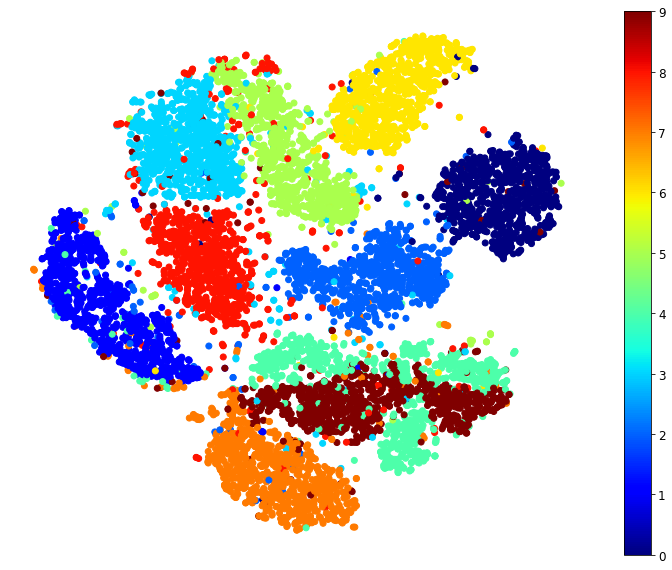

In [33]:
# This creates the scatterplot
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 10))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_sample.astype(int), cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

I'll try PCA and LLE

In [34]:
X_embedded_pca = PCA(n_components=2).fit_transform(X_sample)

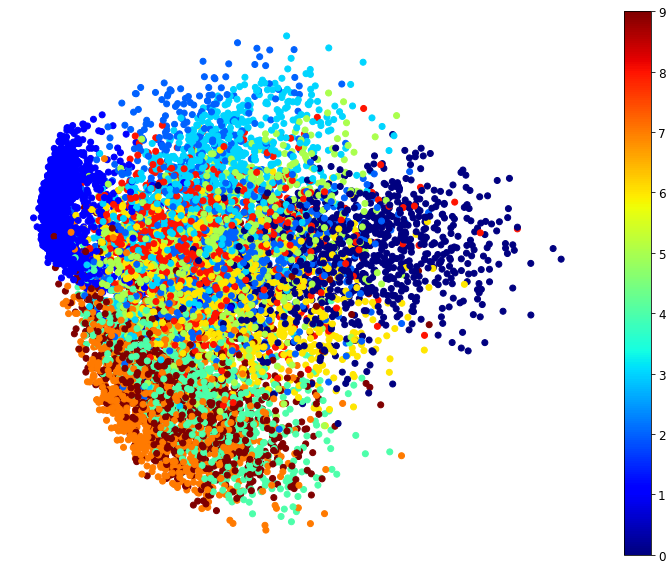

In [35]:
plt.figure(figsize=(13, 10))
plt.scatter(X_embedded_pca[:,0], X_embedded_pca[:,1], c=y_sample.astype(int), cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()

PCA doesn't do a very good job here 🤣 

In [38]:
from sklearn.manifold import LocallyLinearEmbedding

X_embedded_lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10).fit_transform(X_sample)

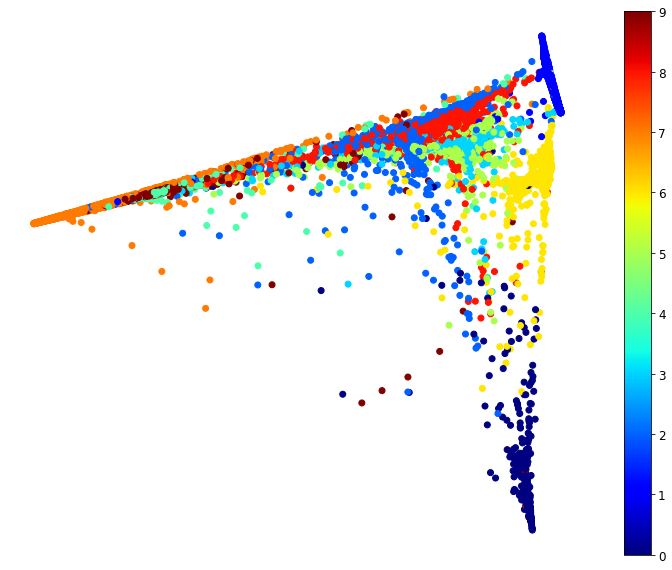

In [37]:
plt.figure(figsize=(13, 10))
plt.scatter(X_embedded_lle[:,0], X_embedded_lle[:,1], c=y_sample.astype(int), cmap='jet')
plt.axis('off')
plt.colorbar()
plt.show()